In [1]:
import json

with open("/Users/simon/Repos/VeroVolley-Group-2/filter/IG/offensiveTest/sentiment_output.json") as f:
    data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/simon/Repos/VeroVolley-Group-2/filter/IG/offensiveTest/sentiment_output.json'

In [103]:
class UserStruct:
    def __init__(self, username, toxicity, severe_toxicity, identity_attack, insult, mean):
        self.username = username
        self.toxic_comments = 1
        self.toxicity = float(toxicity)
        self.severe_toxicity = float(severe_toxicity)
        self.identity_attack = float(identity_attack)
        self.insult = float(insult)
        self.mean = float(mean)

user_struct_list = []

In [104]:
for item in data:
    comments = item['comments']
    for comment in comments:
        if 'toxicity' in comment:
            username = comment['username']
            toxicity = comment['toxicity']
            severe_toxicity = comment['severe_toxicity']
            identity_attack = comment['identity_attack']
            insult = comment['insult']
            
            # Search if the username is already in the list
            username_exists = 0
            for user_struct in user_struct_list:
                if user_struct.username == username:
                    username_exists = 1
                    break

            # Toxic user initialization
            if username_exists == 0:
                try:
                    toxicity = float(toxicity)
                except ValueError:
                    print("Toxicity fail")
                user_struct = UserStruct(username, toxicity, severe_toxicity, identity_attack, insult, 0.0)
                user_struct_list.append(user_struct)
                
            # Sum toxicity to existing user
            else:
                user_struct.toxic_comments += 1
                try:
                    toxicity = float(toxicity)
                    severe_toxicity = float(severe_toxicity)
                    identity_attack = float(identity_attack)
                    insult = float(insult)
                except ValueError:
                    print("Conversion fail")
                user_struct.toxicity += toxicity
                user_struct.severe_toxicity += severe_toxicity
                user_struct.identity_attack += identity_attack
                user_struct.insult += insult
                
                
                

In [105]:
for user_struct in user_struct_list:
    if user_struct.username == 'warrior_fede':
        print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total toxicity: {user_struct.toxicity}")
# 0.280236478

User 'warrior_fede' made 5 toxic comments. Total toxicity: 0.280236478


In [106]:
number_of_toxic_comments_weight = 5
toxicity_weight = 1
severe_toxicity_weight = 10*2/3
identity_attack_weight = 10
insult_weight = 10/3

for user_struct in user_struct_list:
    user_struct.mean = user_struct.toxic_comments * number_of_toxic_comments_weight + user_struct.toxicity * toxicity_weight + user_struct.severe_toxicity * severe_toxicity_weight + user_struct.identity_attack * identity_attack_weight + user_struct.insult * insult_weight
    
count = 0
mean_sorted_user_struct_list = sorted(user_struct_list, key=lambda x: x.mean, reverse=True)
for user_struct in mean_sorted_user_struct_list:
    print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total mean: {user_struct.mean}")
    count += 1
    if count == 10:
        break

User 'gio.rgio_royaume' made 10 toxic comments. Total mean: 89.12988722
User 'robertofiorili' made 10 toxic comments. Total mean: 83.28022469533332
User 'resul93_' made 8 toxic comments. Total mean: 50.04886750666667
User 'fsessa64' made 3 toxic comments. Total mean: 34.15341583666667
User 'gimmy52' made 3 toxic comments. Total mean: 32.655096306666664
User 'rinoraf' made 5 toxic comments. Total mean: 32.48281505933333
User 'skybluvic_' made 4 toxic comments. Total mean: 28.483203644666666
User 'worldofbeauty575' made 4 toxic comments. Total mean: 27.978225479333332
User 'andreascortesi' made 4 toxic comments. Total mean: 26.359888766666668
User 'warrior_fede' made 5 toxic comments. Total mean: 25.834372283833336


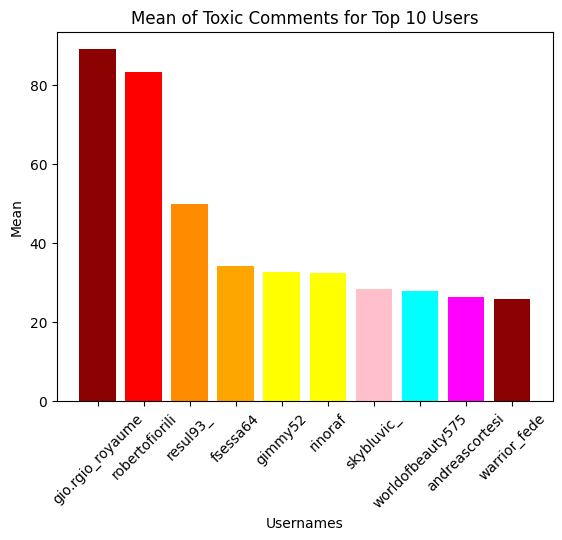

In [119]:

import matplotlib.pyplot as plt

# Extract the usernames and mean values for the first 10 elements
usernames = [user_struct.username for user_struct in mean_sorted_user_struct_list[:10]]
means = [user_struct.mean for user_struct in mean_sorted_user_struct_list[:10]]
colors = ['darkred', 'red', 'darkorange', 'orange', 'yellow', 'yellow', 'pink', 'cyan', 'magenta']

# Plot the bar graph
plt.bar(usernames, means, color=colors)
plt.xlabel('Usernames')
plt.ylabel('Mean')
plt.title('Mean of Toxic Comments for Top 10 Users')
plt.xticks(rotation=45)
plt.show()

In [108]:
toxicity_sorted_user_struct_list = sorted(user_struct_list, key=lambda x: x.toxicity, reverse=True)
count = 0
for user_struct in toxicity_sorted_user_struct_list:
    print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total toxicity: {user_struct.toxicity}")
    count += 1
    if count == 10:
        break

User 'gio.rgio_royaume' made 10 toxic comments. Total toxicity: 4.396238872
User 'robertofiorili' made 10 toxic comments. Total toxicity: 4.07394993
User 'resul93_' made 8 toxic comments. Total toxicity: 2.50586415
User 'fsessa64' made 3 toxic comments. Total toxicity: 2.14697543
User 'el_patriciooo' made 2 toxic comments. Total toxicity: 1.53161549
User 'gimmy52' made 3 toxic comments. Total toxicity: 1.4949134400000001
User 'rinoraf' made 5 toxic comments. Total toxicity: 1.464839133
User 'alesimotommyfrank' made 2 toxic comments. Total toxicity: 1.4445538
User 'fmm_cap' made 2 toxic comments. Total toxicity: 1.4419539000000001
User 'gall.agher69' made 2 toxic comments. Total toxicity: 1.38261634


In [109]:
severe_toxicity_sorted_user_struct_list = sorted(user_struct_list, key=lambda x: x.severe_toxicity, reverse=True)
count = 0
for user_struct in severe_toxicity_sorted_user_struct_list:
    print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total severe toxicity: {user_struct.severe_toxicity}")
    count += 1
    if count == 10:
        break

User 'fsessa64' made 3 toxic comments. Total severe toxicity: 1.1580813
User 'gio.rgio_royaume' made 10 toxic comments. Total severe toxicity: 1.1352075457
User 'robertofiorili' made 10 toxic comments. Total severe toxicity: 0.9598223243
User 'gall.agher69' made 2 toxic comments. Total severe toxicity: 0.70484115
User 'alesimotommyfrank' made 2 toxic comments. Total severe toxicity: 0.52328542
User 'fabioteoo' made 1 toxic comments. Total severe toxicity: 0.50703704
User 'el_patriciooo' made 2 toxic comments. Total severe toxicity: 0.50374498
User 'zep_967' made 1 toxic comments. Total severe toxicity: 0.44787344
User 'guido.p.pedrini' made 1 toxic comments. Total severe toxicity: 0.4379392
User 'real_fox99' made 2 toxic comments. Total severe toxicity: 0.37784466


In [110]:
identity_attack_sorted_user_struct_list = sorted(user_struct_list, key=lambda x: x.identity_attack, reverse=True)
count = 0
for user_struct in identity_attack_sorted_user_struct_list:
    print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total identity attack: {user_struct.identity_attack}")
    count += 1
    if count == 10:
        break

User 'gio.rgio_royaume' made 10 toxic comments. Total identity attack: 1.214898951
User 'robertofiorili' made 10 toxic comments. Total identity attack: 0.9841344869999998
User 'gimmy52' made 3 toxic comments. Total identity attack: 0.96726035
User 'gueyeleuz' made 1 toxic comments. Total identity attack: 0.7895903
User 'va_akarsu' made 1 toxic comments. Total identity attack: 0.76079035
User 'arserri' made 2 toxic comments. Total identity attack: 0.60537434
User 'thejoeyjason' made 1 toxic comments. Total identity attack: 0.57957685
User 'monicaoo3' made 1 toxic comments. Total identity attack: 0.54996765
User 'yfiyfyfjygiyiyitstss585sd99ddo' made 2 toxic comments. Total identity attack: 0.5129903769999999
User 'pippino64' made 1 toxic comments. Total identity attack: 0.5051609


In [111]:
insult_sorted_user_struct_list = sorted(user_struct_list, key=lambda x: x.insult, reverse=True)
count = 0
for user_struct in insult_sorted_user_struct_list:
    print(f"User '{user_struct.username}' made {user_struct.toxic_comments} toxic comments. Total insult: {user_struct.insult}")
    count += 1
    if count == 10:
        break

User 'gio.rgio_royaume' made 10 toxic comments. Total insult: 4.50498256
User 'robertofiorili' made 10 toxic comments. Total insult: 3.88983432
User 'fsessa64' made 3 toxic comments. Total insult: 1.95447317
User 'resul93_' made 8 toxic comments. Total insult: 1.4677364499999999
User 'alesimotommyfrank' made 2 toxic comments. Total insult: 1.4298316500000001
User 'gimmy52' made 3 toxic comments. Total insult: 1.41430578
User 'fmm_cap' made 2 toxic comments. Total insult: 1.3666537
User 'andreascortesi' made 4 toxic comments. Total insult: 1.326474406
User 'rinoraf' made 5 toxic comments. Total insult: 1.3018702409999998
User 'el_patriciooo' made 2 toxic comments. Total insult: 1.2965582599999999
